I am provided with two data sources, one in CVS and an EXCEL file. Both look like they contain the same. Let´s still upload both, concatenate both DataFrames and drop duplicates.
This way I could make sure I am not missing any data points.

# Exploratory data analysis

In [1]:
# importing libraries needed for data exploration and cleaning
import numpy as np
import pandas as pd

In [2]:
# loading the CSV dataset and plotting all in a dataframe
data = "/Users/esthervelasco/Desktop/Educación/IRONHACK/Course content/esther_labs/Technical Assessment/data/measurements.csv"
fuel1_df = pd.read_csv(data) #`read_csv()` is a Pandas function used to read data from a CSV file and create a DataFrame.
fuel1_df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [3]:
# uploading the Excel file data
data = "/Users/esthervelasco/Desktop/Educación/IRONHACK/Course content/esther_labs/Technical Assessment/data/measurements2.xlsx"
fuel2_df = pd.read_excel(data) #`read_csv()` is a Pandas function used to read data from a CSV file and create a DataFrame.
fuel2_df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


To understand whelther measurements and measurements2 contain different information, I merge them and drop duplicates. If I return an empty dataframe, then no extra information will be being provided by the extra file.

In [4]:
# Both dataframes seem the same, we will keep the one having the best data types
fuel1_df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [5]:
fuel2_df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [6]:
data = pd.concat([fuel1_df, fuel2_df], axis = 0)
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [9]:
data.drop_duplicates(inplace=True)

Fuel2, the data on excel format seems better so we will work with that one. I rename and save the data into a csv.

In [11]:
data = fuel2_df
#clean column names:
data.rename(columns = lambda col: col.lower().replace(" ","_"), inplace=True)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   ac             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill_liters  13 non-null     float64
 11  refill_gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


### Assumptions on data
- Distance is measured in km
- Consume is L per 100 km
- speed is trip duration in minutes
- temperature is in Celsius
- specials are weather conditions

### Data cleaning

In [13]:
data.isna().sum() #many null values in refill columns and specials. 
#For the refill, we guess its due to the ocasions where driver needs to refill the tank, which are not everytime the car is used

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [15]:
#in percentage, how many values are missing per column:
data.isna().sum()/len(data)*100
# 96% of refill values are missing, I will drop them

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       3.092784
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
ac                0.000000
rain              0.000000
sun               0.000000
refill_liters    96.649485
refill_gas       96.649485
dtype: float64

In [19]:
# For specials is the weather conditions that is then doubled in individual columns. 
# 295 values are NAN so I will drop these as well
data.specials.value_counts(dropna = False)

specials
NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: count, dtype: int64

In [21]:
cols_to_drop= ["specials","refill_liters","refill_gas"]
data = data.drop(cols_to_drop, axis = 1)

For temperature I am missing 3%, let´s see which type of values I have

In [23]:
data.temp_inside.value_counts(dropna = False)

temp_inside
21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
NaN      12
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: count, dtype: int64

In [26]:
# Inside temperature could be filled with the most recurring temperature, the mode
mode = data["temp_inside"].mode()
mode

0    21.5
Name: temp_inside, dtype: float64

In [27]:
data.temp_inside.fillna(mode[0], inplace = True)

In [28]:
data.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

### Adding features

In [30]:
data["fuel_used"]= data.distance * data.consume/100

In [31]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,fuel_used
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.4000
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.5040
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.6160
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.5031
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.8325
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.5920
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.6923
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.6080
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.7084


Prices of gas as of 22 dec in Germany:

E10 = 2.045

SP96 = 2.15

In [33]:
data["cost_of_trip"] = np.where(data.gas_type== "E10", data.fuel_used*2.045, data.fuel_used*2.152).round(3)
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,fuel_used,cost_of_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.4000,2.863
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.5040,1.031
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.6160,1.260
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.5031,1.029
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.8325,1.702
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.5920,1.274
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.6923,1.490
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.6080,1.308
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.7084,1.524


Cleaning speed column:

In [34]:
data["trip_in_hours"] = data.speed/60  #get hourly speed

In [35]:
data["avg_speed"] = data["distance"]/data["trip_in_hours"] #create a column for average speed

In [37]:
#drop speed column
data = data.drop(["speed"], axis= 1)

In [38]:
data.describe()

,distance,consume,temp_inside,temp_outside,ac,rain,sun,fuel_used,cost_of_trip,trip_in_hours,avg_speed
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,21.916237,11.358247,0.077320,0.123711,0.082474,0.935294,1.968222,0.698797,26.642807
std,22.667837,1.033172,0.997449,6.991542,0.267443,0.329677,0.275441,1.115967,2.363725,0.226642,18.681447
min,1.300000,3.300000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.120000,0.245000,0.233333,3.714286
25%,11.800000,4.300000,21.500000,7.000000,0.000000,0.000000,0.000000,0.551650,1.155000,0.545833,16.465116
50%,14.600000,4.700000,22.000000,10.000000,0.000000,0.000000,0.000000,0.680600,1.422500,0.675000,22.000000
75%,19.000000,5.300000,22.500000,16.000000,0.000000,0.000000,0.000000,0.916500,1.923000,0.833333,31.083333
max,216.100000,12.200000,25.500000,31.000000,1.000000,1.000000,1.000000,11.453300,24.648000,1.500000,158.250000


In [40]:
#check summary statistics for numerical variables:
data.dtypes
data_num = data.select_dtypes(np.number)
data_cat = data.select_dtypes(object)

In [44]:
data_num.describe().T  #.T to transpose columns and have a better overview of each column´ indicators

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.300000,11.800000,14.6000,19.000000,216.1000
consume,388.0,4.912371,1.033172,3.300000,4.300000,4.7000,5.300000,12.2000
temp_inside,388.0,21.916237,0.997449,19.000000,21.500000,22.0000,22.500000,25.5000
temp_outside,388.0,11.358247,6.991542,-5.000000,7.000000,10.0000,16.000000,31.0000
ac,388.0,0.077320,0.267443,0.000000,0.000000,0.0000,0.000000,1.0000
rain,388.0,0.123711,0.329677,0.000000,0.000000,0.0000,0.000000,1.0000
sun,388.0,0.082474,0.275441,0.000000,0.000000,0.0000,0.000000,1.0000
fuel_used,388.0,0.935294,1.115967,0.120000,0.551650,0.6806,0.916500,11.4533
cost_of_trip,388.0,1.968222,2.363725,0.245000,1.155000,1.4225,1.923000,24.6480
trip_in_hours,388.0,0.698797,0.226642,0.233333,0.545833,0.6750,0.833333,1.5000


In [45]:
data.to_csv("data/cleaned_data.csv", index = False)

# Visualizations

A priori it seems relevant to plot:
- Fuel mostly consumed?
- Consumption per fuel
- cost of trip per fuel type
- trip consumption depending on weather


In [47]:
# import my libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='gas_type', ylabel='count'>

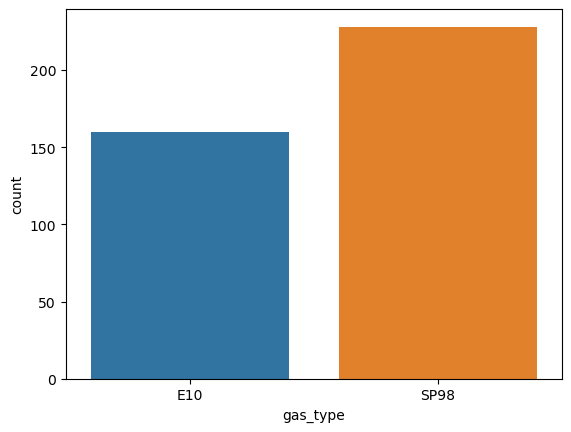

In [54]:
fig,ax = plt.subplots()
sns.countplot(x=data.gas_type)

SP98 is the mostly used fuel

/Users/esthervelasco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/esthervelasco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/esthervelasco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/esthervelasco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/esthervelasco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/esthervelasco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserW

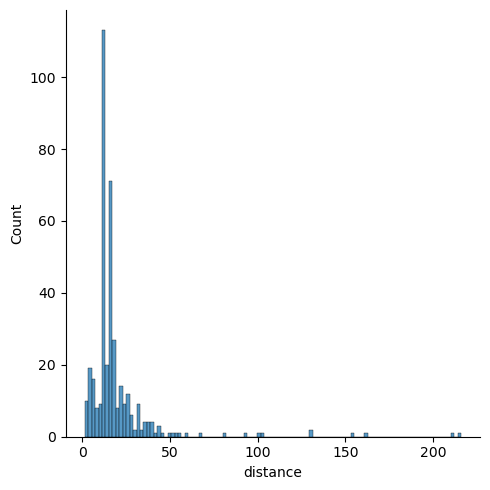

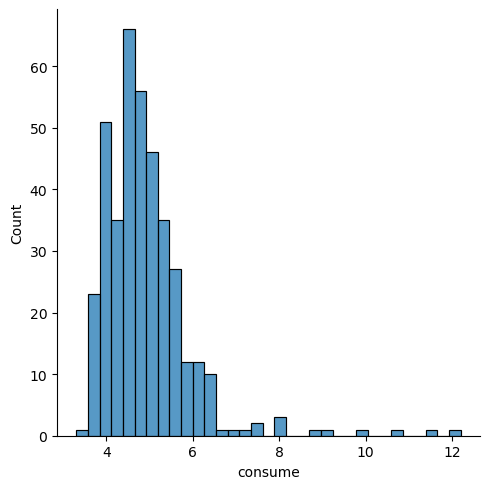

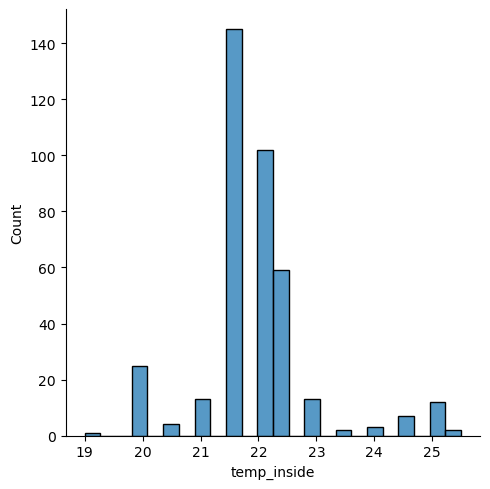

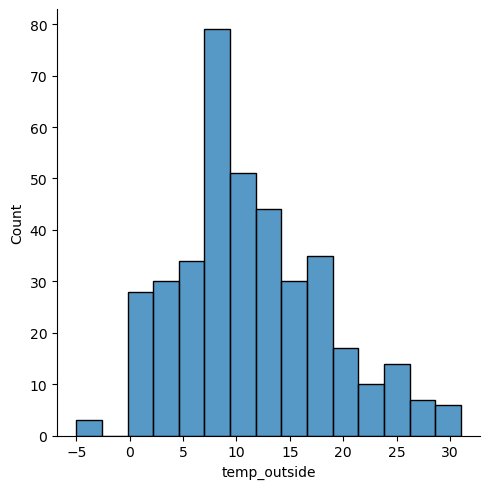

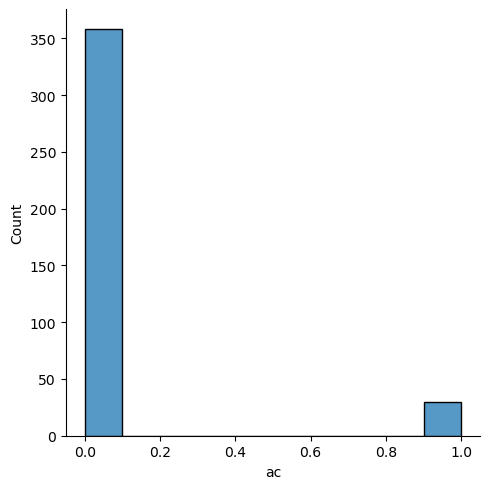

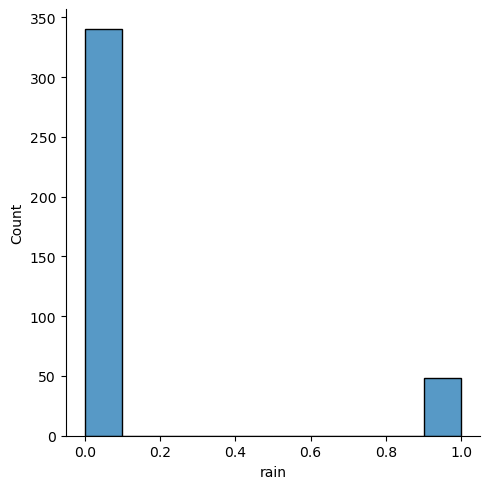

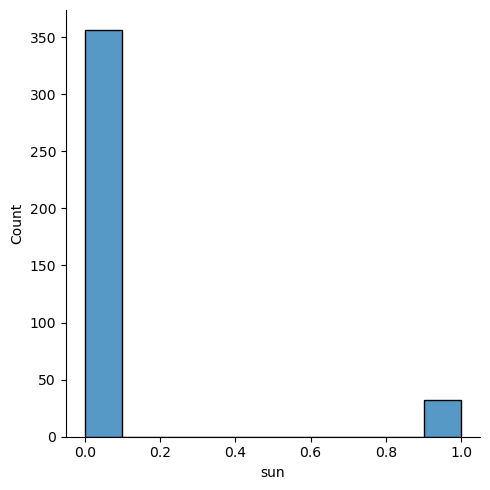

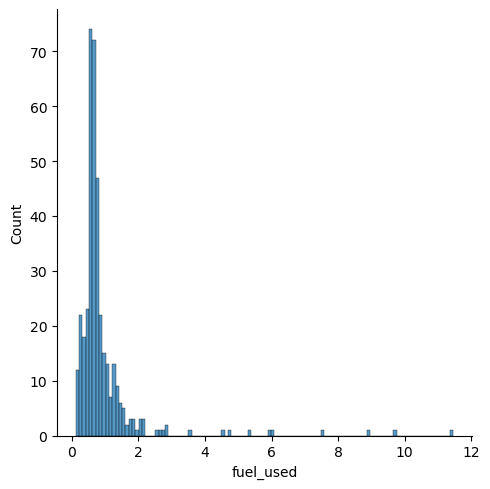

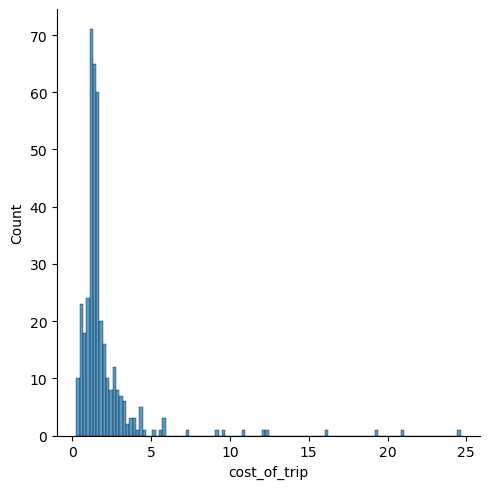

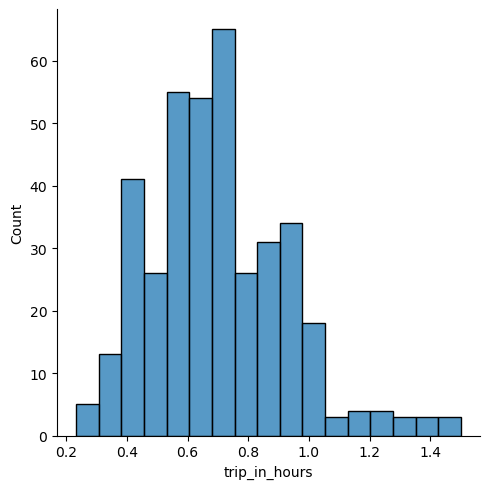

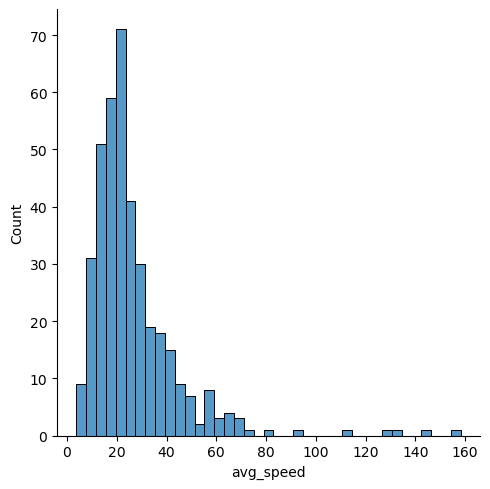

In [55]:
#plot distribution of each numerical indicator
for column in data_num:
    sns.displot(data_num[column])

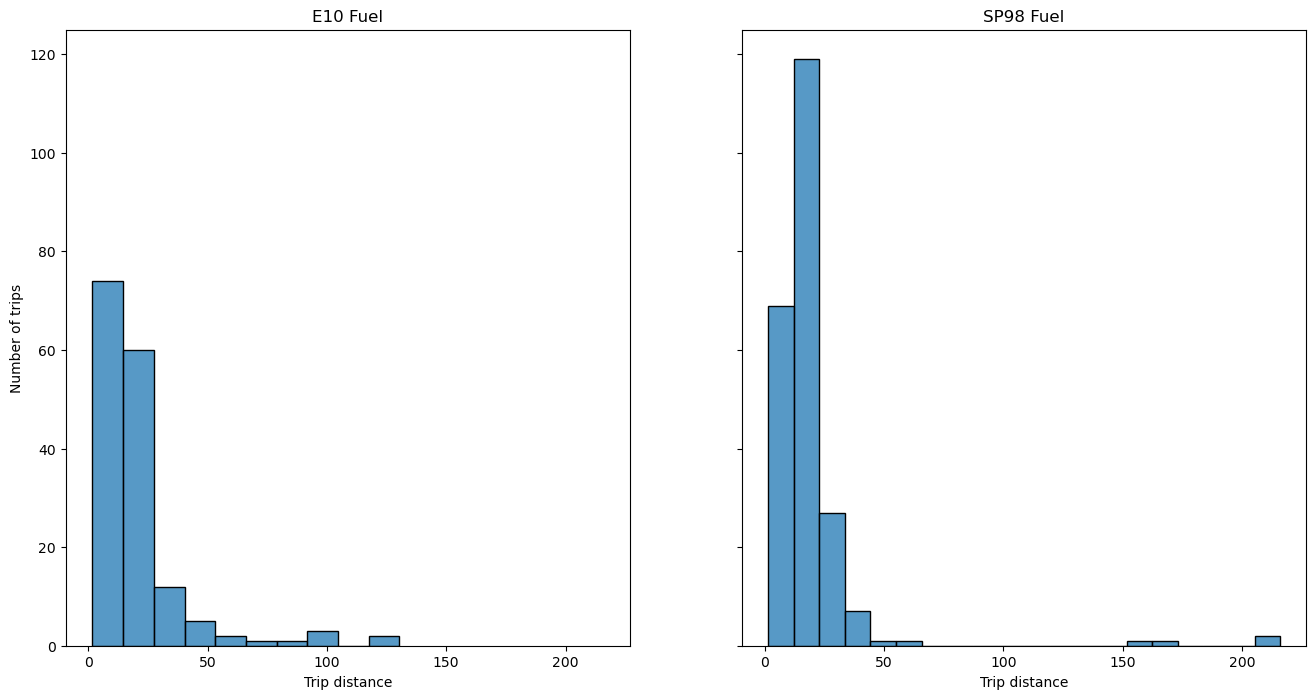

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True, sharex=True)
cole10 = data[data.gas_type == "E10"]
col98 = data[data.gas_type == "SP98"]

sns.histplot(ax=axes[0], data=cole10, x="distance", bins=10, label="E10").set(title="E10 Fuel")
axes[0].set(xlabel="Trip distance", ylabel="Number of trips")

sns.histplot(ax=axes[1], data=col98, x="distance", bins=20, label="SP98").set(title="SP98 Fuel")
axes[1].set(xlabel="Trip distance", ylabel="Number of trips")

plt.show()

The fuel used for longer trips is SP98.

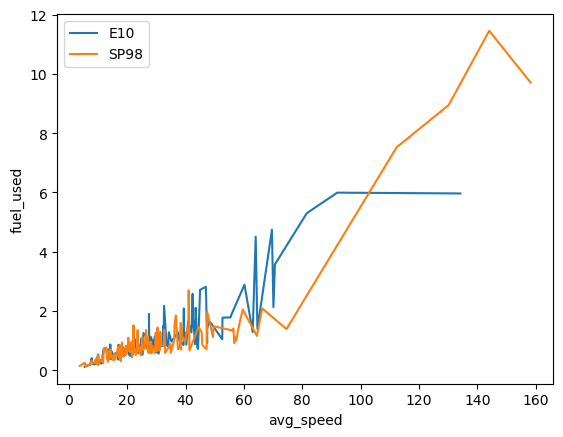

In [61]:
fig, axes = plt.subplots()
cole10 = data[data.gas_type == "E10"]
col98 = data[data.gas_type == "SP98"]

ax1= sns.lineplot(data=cole10, x=cole10["avg_speed"], y= cole10["fuel_used"],label="E10")
ax2= sns.lineplot(data=col98, x=col98["avg_speed"], y= col98["fuel_used"],label="SP98")

plt.legend(loc="upper left")
plt.show()

The higher the average speed, the more fuel is used by SP98. E10 presents itself as cheaper since consumptin stabilizes at 100km

In [66]:
display(data["cost_of_trip"].max())
display(data["cost_of_trip"].min())

24.648

0.245

Max cost of the trip was roughtly 25 euros and minimum was 0.2 cents

### Conclusions and insights

- Recommend to assign higher speed trips to E10 fuel
- Short distance trips have a similar consumption for both fuels